In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Data

In [80]:
df_blast2go = pd.read_csv('data/blast2go_go_table.txt', delimiter = "\t")

In [81]:
df_blast2go

,Unnamed: 0,Tags,SeqName,Description,Length,#Hits,e-Value,sim mean,#GO,GO IDs,GO Names,Enzyme Codes,Enzyme Names,InterPro IDs,InterPro GO IDs,InterPro GO Names
0,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS00005|dnaA|chromosomal,chromosomal replication initiator protein DnaA,1317,20.0,0.000000e+00,94.75,5.0,F:GO:0003688; F:GO:0005524; C:GO:0005737; P:GO...,F:DNA replication origin binding; F:ATP bindin...,NaN,NaN,IPR020591 (PRINTS); IPR013159 (SMART); IPR0035...,F:GO:0003677; F:GO:0003688; F:GO:0005524; P:GO...,F:DNA binding; F:DNA replication origin bindin...
1,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS00010||DNA,DNA polymerase III subunit beta,1101,20.0,0.000000e+00,89.35,8.0,F:GO:0003677; F:GO:0003887; C:GO:0005737; P:GO...,F:DNA binding; F:DNA-directed DNA polymerase a...,EC:2.7.7.7,DNA-directed DNA polymerase,IPR001001 (SMART); G3DSA:3.10.150.10 (GENE3D);...,F:GO:0003677; F:GO:0003887; P:GO:0006260; F:GO...,F:DNA binding; F:DNA-directed DNA polymerase a...
2,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS00015|recF|DNA,DNA replication/repair protein RecF,1080,20.0,0.000000e+00,80.63,6.0,F:GO:0003697; F:GO:0005524; C:GO:0005737; P:GO...,F:single-stranded DNA binding; F:ATP binding; ...,NaN,NaN,IPR042174 (G3DSA:1.20.1050.GENE3D); IPR003395 ...,F:GO:0003697; F:GO:0005524; P:GO:0006281,F:single-stranded DNA binding; F:ATP binding; ...
3,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS00020|gyrB|DNA,DNA topoisomerase (ATP-hydrolyzing) subunit B,2415,20.0,0.000000e+00,94.67,8.0,F:GO:0003677; F:GO:0003918; F:GO:0005524; C:GO...,F:DNA binding; F:DNA topoisomerase type II (do...,EC:3.6.1.3; EC:5.6.2.2; EC:3.6.1.15,Adenosinetriphosphatase; n/a; Nucleoside-triph...,PR00418 (PRINTS); IPR000565 (PRINTS); IPR00359...,F:GO:0003677; F:GO:0003918; F:GO:0005524; C:GO...,F:DNA binding; F:DNA topoisomerase type II (do...
4,True,"[INTERPRO, BLASTED]",EQU24_RS00025||hypothetical,membrane protein,237,20.0,1.550160e-49,83.50,NaN,NaN,NaN,NaN,NaN,no IPS match,no IPS match,no IPS match
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4368,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS22135|mnmE|tRNA,tRNA uridine-5-carboxymethylaminomethyl(34) sy...,1347,20.0,0.000000e+00,89.80,6.0,F:GO:0003924; F:GO:0005515; F:GO:0005525; C:GO...,F:GTPase activity; F:protein binding; F:GTP bi...,EC:3.6.1.15,Nucleoside-triphosphate phosphatase,IPR004520 (TIGRFAM); IPR006073 (PFAM); IPR0258...,F:GO:0003924; F:GO:0005515; F:GO:0005525; P:GO...,F:GTPase activity; F:protein binding; F:GTP bi...
4369,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS22140|yidC|membrane,membrane protein insertase YidC,1698,20.0,0.000000e+00,86.48,5.0,C:GO:0005886; P:GO:0015031; C:GO:0016021; F:GO...,C:plasma membrane; P:protein transport; C:inte...,NaN,NaN,IPR001708 (PRINTS); IPR001708 (PRINTS); IPR038...,C:GO:0016021; F:GO:0032977,C:integral component of membrane; F:membrane i...
4370,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS22145|yidD|membrane,membrane protein insertion efficiency factor YidD,222,20.0,5.161060e-47,88.95,1.0,C:GO:0005886,C:plasma membrane,NaN,NaN,IPR002696 (SMART); IPR002696 (TIGRFAM); IPR002...,no GO terms,no GO terms
4371,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS22150|rnpA|ribonuclease,ribonuclease P protein component,369,20.0,1.697640e-74,88.38,4.0,F:GO:0000049; P:GO:0001682; F:GO:0004526; P:GO...,F:tRNA binding; P:tRNA 5'-leader removal; F:ri...,EC:3.1.30; EC:3.1.26; EC:3.1.26.5,Acting on ester bonds; Acting on ester bonds; ...,IPR014721 (G3DSA:3.30.230.GENE3D); IPR000100 (...,F:GO:0000049; F:GO:0004526; P:GO:0008033,F:tRNA binding; F:ribonuclease P activity; P:t...


In [82]:
df_gofeat = pd.read_csv('data/gofeat_go_annotation.txt', delimiter = "\t")

In [83]:
df_gofeat

,#,Locus tag,Length,Product,Completeness,Gene onthology,SEED,Protein databases,Genome annotation databases,Family and domain databases,Crossreferences
0,1,EQU24_RS00005|dnaA|chromosomal replication ini...,438.0,Chromosomal replication initiator protein DnaA,99.77% [1314/1317],GO:0003688 - DNA replication origin binding|GO...,NaN,Uniprot (A0A4P9UMW3)|Interpro (A0A4P9UMW3),KEGG (mbur:EQU24_00005)|KEGG GM (mbur:EQU24_00...,Interpro (IPR003593)|Interpro (IPR001957)|Inte...,EMBL (CP035467)
1,2,EQU24_RS00010||DNA polymerase III subunit beta,366.0,Beta sliding clamp,99.73% [1098/1101],GO:0003677 - DNA binding|GO:0003887 - DNA-dire...,NaN,Uniprot (A0A4P9UIN3)|Interpro (A0A4P9UIN3),KEGG (mbur:EQU24_00010)|KEGG GM (mbur:EQU24_00...,Interpro (IPR001001)|Interpro (IPR022635)|Inte...,EMBL (CP035467)
2,3,EQU24_RS00015|recF|DNA replication/repair prot...,359.0,DNA replication and repair protein RecF,99.72% [1077/1080],GO:0003697 - single-stranded DNA binding|GO:00...,NaN,Uniprot (A0A4P9UIH3)|Interpro (A0A4P9UIH3),KEGG (mbur:EQU24_00015)|KEGG GM (mbur:EQU24_00...,Interpro (IPR001238)|Interpro (IPR027417)|Inte...,EMBL (CP035467)
3,4,EQU24_RS00020|gyrB|DNA topoisomerase (ATP-hydr...,804.0,DNA gyrase subunit B,99.88% [2412/2415],GO:0003677 - DNA binding|GO:0003918 - DNA topo...,NaN,Uniprot (A0A4P9UI83)|Interpro (A0A4P9UI83),KEGG (mbur:EQU24_00020)|KEGG GM (mbur:EQU24_00...,Interpro (IPR002288)|Interpro (IPR011557)|Inte...,EMBL (CP035467)
4,5,EQU24_RS00025||hypothetical protein,77.0,Uncharacterized protein,97.47% [231/237],NaN,NaN,Uniprot (A0A4P9UJZ0)|Interpro (A0A4P9UJZ0),KEGG (mbur:EQU24_00025)|KEGG GM (mbur:EQU24_00...,NaN,EMBL (CP035467)
...,...,...,...,...,...,...,...,...,...,...,...
4368,4369,EQU24_RS22135|mnmE|tRNA uridine-5-carboxymethy...,447.0,tRNA modification GTPase MnmE,99.55% [1341/1347],GO:0003924 - GTPase activity|GO:0005525 - GTP ...,NaN,Uniprot (A0A4P9USW8)|Interpro (A0A4P9USW8),KEGG (mbur:EQU24_22115)|KEGG GM (mbur:EQU24_22...,Interpro (IPR031168)|Interpro (IPR018948)|Inte...,EMBL (CP035467)
4369,4370,EQU24_RS22140|yidC|membrane protein insertase ...,565.0,Membrane protein insertase YidC,99.82% [1695/1698],GO:0005886 - plasma membrane|GO:0015031 - prot...,NaN,Uniprot (A0A4V1IKE6)|Interpro (A0A4V1IKE6),KEGG (mbur:EQU24_22120)|KEGG GM (mbur:EQU24_22...,Interpro (IPR019998)|Interpro (IPR028055)|Inte...,EMBL (CP035467)
4370,4371,EQU24_RS22145|yidD|membrane protein insertion ...,73.0,Putative membrane protein insertion efficiency...,98.65% [219/222],GO:0005886 - plasma membrane,NaN,Uniprot (A0A4P9UXR4)|Interpro (A0A4P9UXR4),KEGG (mbur:EQU24_22125)|KEGG GM (mbur:EQU24_22...,Interpro (IPR002696)|Pfam (PF01809),EMBL (CP035467)
4371,4372,EQU24_RS22150|rnpA|ribonuclease P protein comp...,121.0,Ribonuclease P protein component,98.37% [363/369],GO:0000049 - tRNA binding|GO:0001682 - tRNA 5'...,NaN,Uniprot (A0A351UY10)|Interpro (A0A351UY10),NaN,Interpro (IPR020568)|Interpro (IPR014721)|Inte...,EMBL (DNKF01000037)


# Workflow

- separate out the loci as separate columns
- separate out the GO Term #
- Use new data frame to query based on the clusters generated previously --> bunch the ones of interest together 
    - this means that we need to have a compiled list of the EQU loci #s for the smaller groups of interest --> we have code for this already!
- Once groups of the GO Terms are found: 
    - Preliminary Stages: 
        - view the GO terms (with basic GO #)
        - view the whole row (with meta data)
    - Further Down: 
        - generate some way to visualize the GO terms listed (handling conditions even where there are unrelated GO terms ----> meaning there may be more than 1 DAG )

# Query-able Dataframe construction

## df_blast2go

In [175]:
df_expanded_tags_blast2go = df_blast2go['SeqName'].str.split('|', expand = True)

new_df_columns = list(df_blast2go.columns)  + ["locus_id", "gene_name", "product"]

df_blast2go_cleaned = df_blast2go.join(df_expanded_tags_blast2go)

df_blast2go_cleaned.columns = new_df_columns

df_blast2go_cleaned = df_blast2go_cleaned[df_blast2go_cleaned['GO IDs'].notna()]
df_blast2go_cleaned = df_blast2go_cleaned[df_blast2go_cleaned['InterPro GO IDs'].notna()]


df_blast2go_cleaned


,Unnamed: 0,Tags,SeqName,Description,Length,#Hits,e-Value,sim mean,#GO,GO IDs,GO Names,Enzyme Codes,Enzyme Names,InterPro IDs,InterPro GO IDs,InterPro GO Names,locus_id,gene_name,product
0,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS00005|dnaA|chromosomal,chromosomal replication initiator protein DnaA,1317,20.0,0.000000e+00,94.75,5.0,F:GO:0003688; F:GO:0005524; C:GO:0005737; P:GO...,F:DNA replication origin binding; F:ATP bindin...,NaN,NaN,IPR020591 (PRINTS); IPR013159 (SMART); IPR0035...,F:GO:0003677; F:GO:0003688; F:GO:0005524; P:GO...,F:DNA binding; F:DNA replication origin bindin...,EQU24_RS00005,dnaA,chromosomal
1,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS00010||DNA,DNA polymerase III subunit beta,1101,20.0,0.000000e+00,89.35,8.0,F:GO:0003677; F:GO:0003887; C:GO:0005737; P:GO...,F:DNA binding; F:DNA-directed DNA polymerase a...,EC:2.7.7.7,DNA-directed DNA polymerase,IPR001001 (SMART); G3DSA:3.10.150.10 (GENE3D);...,F:GO:0003677; F:GO:0003887; P:GO:0006260; F:GO...,F:DNA binding; F:DNA-directed DNA polymerase a...,EQU24_RS00010,,DNA
2,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS00015|recF|DNA,DNA replication/repair protein RecF,1080,20.0,0.000000e+00,80.63,6.0,F:GO:0003697; F:GO:0005524; C:GO:0005737; P:GO...,F:single-stranded DNA binding; F:ATP binding; ...,NaN,NaN,IPR042174 (G3DSA:1.20.1050.GENE3D); IPR003395 ...,F:GO:0003697; F:GO:0005524; P:GO:0006281,F:single-stranded DNA binding; F:ATP binding; ...,EQU24_RS00015,recF,DNA
3,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS00020|gyrB|DNA,DNA topoisomerase (ATP-hydrolyzing) subunit B,2415,20.0,0.000000e+00,94.67,8.0,F:GO:0003677; F:GO:0003918; F:GO:0005524; C:GO...,F:DNA binding; F:DNA topoisomerase type II (do...,EC:3.6.1.3; EC:5.6.2.2; EC:3.6.1.15,Adenosinetriphosphatase; n/a; Nucleoside-triph...,PR00418 (PRINTS); IPR000565 (PRINTS); IPR00359...,F:GO:0003677; F:GO:0003918; F:GO:0005524; C:GO...,F:DNA binding; F:DNA topoisomerase type II (do...,EQU24_RS00020,gyrB,DNA
7,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS00040||TolC,TolC family protein,1257,20.0,0.000000e+00,84.76,2.0,F:GO:0015562; P:GO:0055085,F:efflux transmembrane transporter activity; P...,NaN,NaN,IPR003423 (PFAM); G3DSA:1.20.1600.10 (GENE3D);...,F:GO:0015562; P:GO:0055085,F:efflux transmembrane transporter activity; P...,EQU24_RS00040,,TolC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4368,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS22135|mnmE|tRNA,tRNA uridine-5-carboxymethylaminomethyl(34) sy...,1347,20.0,0.000000e+00,89.80,6.0,F:GO:0003924; F:GO:0005515; F:GO:0005525; C:GO...,F:GTPase activity; F:protein binding; F:GTP bi...,EC:3.6.1.15,Nucleoside-triphosphate phosphatase,IPR004520 (TIGRFAM); IPR006073 (PFAM); IPR0258...,F:GO:0003924; F:GO:0005515; F:GO:0005525; P:GO...,F:GTPase activity; F:protein binding; F:GTP bi...,EQU24_RS22135,mnmE,tRNA
4369,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS22140|yidC|membrane,membrane protein insertase YidC,1698,20.0,0.000000e+00,86.48,5.0,C:GO:0005886; P:GO:0015031; C:GO:0016021; F:GO...,C:plasma membrane; P:protein transport; C:inte...,NaN,NaN,IPR001708 (PRINTS); IPR001708 (PRINTS); IPR038...,C:GO:0016021; F:GO:0032977,C:integral component of membrane; F:membrane i...,EQU24_RS22140,yidC,membrane
4370,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS22145|yidD|membrane,membrane protein insertion efficiency factor YidD,222,20.0,5.161060e-47,88.95,1.0,C:GO:0005886,C:plasma membrane,NaN,NaN,IPR002696 (SMART); IPR002696 (TIGRFAM); IPR002...,no GO terms,no GO terms,EQU24_RS22145,yidD,membrane
4371,True,"[INTERPRO, BLASTED, MAPPED, ANNOTATED]",EQU24_RS22150|rnpA|ribonuclease,ribonuclease P protein component,369,20.0,1.697640e-74,88.38,4.0,F:GO:0000049; P:GO:0001682; F:GO:0004526; P:GO...,F:tRNA binding; P:tRNA 5'-leader removal; F:ri...,EC:3.1.30; EC:3.1.26; EC:3.1.26.5,Acting on ester bonds; Acting on ester bonds; ...,IPR014721 (G3DSA:3.30.230.GENE3D); IPR000100 (...,

In [173]:
df_expanded_tags_go_feat = df_gofeat['Locus tag'].str.split('|', expand = True)

new_df_columns = list(df_gofeat.columns)  + ["locus_id", "gene_name", "product"]

df_gofeat_cleaned = df_gofeat.join(df_expanded_tags_go_feat)

df_gofeat_cleaned.columns = new_df_columns

df_gofeat_cleaned = df_gofeat_cleaned[df_gofeat_cleaned['Gene onthology'].notna()]

df_gofeat_cleaned

,#,Locus tag,Length,Product,Completeness,Gene onthology,SEED,Protein databases,Genome annotation databases,Family and domain databases,Crossreferences,locus_id,gene_name,product
0,1,EQU24_RS00005|dnaA|chromosomal replication ini...,438.0,Chromosomal replication initiator protein DnaA,99.77% [1314/1317],GO:0003688 - DNA replication origin binding|GO...,NaN,Uniprot (A0A4P9UMW3)|Interpro (A0A4P9UMW3),KEGG (mbur:EQU24_00005)|KEGG GM (mbur:EQU24_00...,Interpro (IPR003593)|Interpro (IPR001957)|Inte...,EMBL (CP035467),EQU24_RS00005,dnaA,chromosomal replication initiator protein DnaA
1,2,EQU24_RS00010||DNA polymerase III subunit beta,366.0,Beta sliding clamp,99.73% [1098/1101],GO:0003677 - DNA binding|GO:0003887 - DNA-dire...,NaN,Uniprot (A0A4P9UIN3)|Interpro (A0A4P9UIN3),KEGG (mbur:EQU24_00010)|KEGG GM (mbur:EQU24_00...,Interpro (IPR001001)|Interpro (IPR022635)|Inte...,EMBL (CP035467),EQU24_RS00010,,DNA polymerase III subunit beta
2,3,EQU24_RS00015|recF|DNA replication/repair prot...,359.0,DNA replication and repair protein RecF,99.72% [1077/1080],GO:0003697 - single-stranded DNA binding|GO:00...,NaN,Uniprot (A0A4P9UIH3)|Interpro (A0A4P9UIH3),KEGG (mbur:EQU24_00015)|KEGG GM (mbur:EQU24_00...,Interpro (IPR001238)|Interpro (IPR027417)|Inte...,EMBL (CP035467),EQU24_RS00015,recF,DNA replication/repair protein RecF
3,4,EQU24_RS00020|gyrB|DNA topoisomerase (ATP-hydr...,804.0,DNA gyrase subunit B,99.88% [2412/2415],GO:0003677 - DNA binding|GO:0003918 - DNA topo...,NaN,Uniprot (A0A4P9UI83)|Interpro (A0A4P9UI83),KEGG (mbur:EQU24_00020)|KEGG GM (mbur:EQU24_00...,Interpro (IPR002288)|Interpro (IPR011557)|Inte...,EMBL (CP035467),EQU24_RS00020,gyrB,DNA topoisomerase (ATP-hydrolyzing) subunit B
7,8,EQU24_RS00040||TolC family protein,418.0,TolC family protein,99.76% [1254/1257],GO:0015562 - efflux transmembrane transporter ...,NaN,Uniprot (A0A4P9UI68)|Interpro (A0A4P9UI68),KEGG (mbur:EQU24_00040)|KEGG GM (mbur:EQU24_00...,Interpro (IPR003423)|Pfam (PF02321),EMBL (CP035467),EQU24_RS00040,,TolC family protein
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4368,4369,EQU24_RS22135|mnmE|tRNA uridine-5-carboxymethy...,447.0,tRNA modification GTPase MnmE,99.55% [1341/1347],GO:0003924 - GTPase activity|GO:0005525 - GTP ...,NaN,Uniprot (A0A4P9USW8)|Interpro (A0A4P9USW8),KEGG (mbur:EQU24_22115)|KEGG GM (mbur:EQU24_22...,Interpro (IPR031168)|Interpro (IPR018948)|Inte...,EMBL (CP035467),EQU24_RS22135,mnmE,tRNA uridine-5-carboxymethylaminomethyl(34) sy...
4369,4370,EQU24_RS22140|yidC|membrane protein insertase ...,565.0,Membrane protein insertase YidC,99.82% [1695/1698],GO:0005886 - plasma membrane|GO:0015031 - prot...,NaN,Uniprot (A0A4V1IKE6)|Interpro (A0A4V1IKE6),KEGG (mbur:EQU24_22120)|KEGG GM (mbur:EQU24_22...,Interpro (IPR019998)|Interpro (IPR028055)|Inte...,EMBL (CP035467),EQU24_RS22140,yidC,membrane protein insertase YidC
4370,4371,EQU24_RS22145|yidD|membrane protein insertion ...,73.0,Putative membrane protein insertion efficiency...,98.65% [219/222],GO:0005886 - plasma membrane,NaN,Uniprot (A0A4P9UXR4)|Interpro (A0A4P9UXR4),KEGG (mbur:EQU24_22125)|KEGG GM (mbur:EQU24_22...,Interpro (IPR002696)|Pfam (PF01809),EMBL (CP035467),EQU24_RS22145,yidD,membrane protein insertion efficiency factor YidD
4371,4372,EQU24_RS22150|rnpA|ribonuclease P protein comp...,121.0,Ribonuclease P protein component,98.37% [363/369],GO:0000049 - tRNA binding|GO:0001682 - tRNA 5'...,NaN,Uniprot (A0A351UY10)|Interpro (A0A351UY10),NaN,Interpro (IPR020568)|Interpro (IPR014721)|Inte...,EMBL (DNKF01000037),EQU24_RS22150,rnpA,ribonuclease P protein component


# GO Term Similarity

# Exploration of Dataframes

In [139]:
y = list(df_blast2go_cleaned.iloc[0]["InterPro GO IDs"].split(";"))

In [140]:
y

['F:GO:0003677',
 ' F:GO:0003688',
 ' F:GO:0005524',
 ' P:GO:0006270',
 ' P:GO:0006275',
 ' F:GO:0043565']

In [166]:
x = list(df_blast2go_cleaned.iloc[5]["GO IDs"].split(";"))

AttributeError: 'float' object has no attribute 'split'

In [155]:
x

['F:GO:0003688',
 ' F:GO:0005524',
 ' C:GO:0005737',
 ' P:GO:0006270',
 ' P:GO:0006275']

In [156]:
z = set(x).intersection(set(y))

In [157]:
z

{' F:GO:0005524', ' P:GO:0006270', ' P:GO:0006275'}

In [158]:
len(z) / len(set(x).union(set(y)))

0.375

In [159]:
len(z) / len(min(x, y))

0.5

In [153]:
min(x, y)

['F:GO:0003677',
 ' F:GO:0003688',
 ' F:GO:0005524',
 ' P:GO:0006270',
 ' P:GO:0006275',
 ' F:GO:0043565']

In [179]:
go_term_holder = []

for locus in range(len(df_blast2go_cleaned.index)):

    
    locus_id = df_blast2go_cleaned.iloc[locus]["locus_id"]
    
    go_ids = list(df_blast2go_cleaned.iloc[locus]["GO IDs"].split(";"))
    interpro_go_ids = list(df_blast2go_cleaned.iloc[locus]["InterPro GO IDs"].split(";"))
    
    overlap_go_terms = set(go_ids).intersection(set(interpro_go_ids))
    
    jaccard_similarity = len(overlap_go_terms) / len(set(go_ids).union(set(interpro_go_ids)))
    
    overlap_similarity = 0
    
    if len(go_ids) > len(interpro_go_ids):
        overlap_similarity = -1 * len(overlap_go_terms) / len(set(interpro_go_ids))
    else: 
        overlap_similarity = len(overlap_go_terms) / len(set(go_ids))
        
    go_term_holder.append([locus_id, go_ids, interpro_go_ids, jaccard_similarity, overlap_similarity, overlap_go_terms])
    
df_blast2go_sims = pd.DataFrame(go_term_holder)

df_blast2go_sims.columns = ["locus_id", "GO_IDs", "Interpro_GO_IDs", "Jaccard_Sim", "Overlap_Sim", "Overlap_GO_IDs"]
df_blast2go_sims

,locus_id,GO_IDs,Interpro_GO_IDs,Jaccard_Sim,Overlap_Sim,Overlap_GO_IDs
0,EQU24_RS00005,"[F:GO:0003688, F:GO:0005524, C:GO:0005737, ...","[F:GO:0003677, F:GO:0003688, F:GO:0005524, ...",0.375000,0.600000,"{ P:GO:0006275, P:GO:0006270, F:GO:0005524}"
1,EQU24_RS00010,"[F:GO:0003677, F:GO:0003887, C:GO:0005737, ...","[F:GO:0003677, F:GO:0003887, P:GO:0006260, ...",0.625000,-1.000000,"{ C:GO:0009360, P:GO:0006260, F:GO:0003887, ..."
2,EQU24_RS00015,"[F:GO:0003697, F:GO:0005524, C:GO:0005737, ...","[F:GO:0003697, F:GO:0005524, P:GO:0006281]",0.500000,-1.000000,"{ F:GO:0005524, F:GO:0003697, P:GO:0006281}"
3,EQU24_RS00020,"[F:GO:0003677, F:GO:0003918, F:GO:0005524, ...","[F:GO:0003677, F:GO:0003918, F:GO:0005524, ...",0.625000,-1.000000,"{ F:GO:0003918, F:GO:0005524, P:GO:0006265, ..."
4,EQU24_RS00040,"[F:GO:0015562, P:GO:0055085]","[F:GO:0015562, P:GO:0055085]",1.000000,1.000000,"{F:GO:0015562, P:GO:0055085}"
...,...,...,...,...,...,...
3406,EQU24_RS22135,"[F:GO:0003924, F:GO:0005515, F:GO:0005525, ...","[F:GO:0003924, F:GO:0005515, F:GO:0005525, ...",0.666667,-1.000000,"{ P:GO:0006400, F:GO:0003924, F:GO:0005525, ..."
3407,EQU24_RS22140,"[C:GO:0005886, P:GO:0015031, C:GO:0016021, ...","[C:GO:0016021, F:GO:0032977]",0.166667,-0.500000,{ F:GO:0032977}
3408,EQU24_RS22145,[C:GO:0005886],[no GO terms],0.000000,0.000000,{}
3409,EQU24_RS22150,"[F:GO:0000049, P:GO:0001682, F:GO:0004526, ...","[F:GO:0000049, F:GO:0004526, P:GO:0008033]",0.400000,-0.666667,"{F:GO:0000049, F:GO:0004526}"


<b> It is evident that there is a lack of intersection between 1000+ gene loci and their constituent GO Terms

In [195]:
df_zero_similiarity = df_blast2go_sims[(df_blast2go_sims["Jaccard_Sim"] == 0) & (df_blast2go_sims["Overlap_Sim"] == 0)]
df_zero_similiarity

,locus_id,GO_IDs,Interpro_GO_IDs,Jaccard_Sim,Overlap_Sim,Overlap_GO_IDs
8,EQU24_RS00065,[C:GO:0016021],[no GO terms],0.0,0.0,{}
14,EQU24_RS00095,[F:GO:0016787],[no GO terms],0.0,0.0,{}
19,EQU24_RS00135,[C:GO:0016021],[no GO terms],0.0,0.0,{}
21,EQU24_RS00160,[C:GO:0016020],[no IPS match],0.0,0.0,{}
23,EQU24_RS00175,"[F:GO:0003677, F:GO:0004803, P:GO:0006313, ...",[no IPS match],0.0,0.0,{}
...,...,...,...,...,...,...
3399,EQU24_RS22075,[C:GO:0016021],[no GO terms],0.0,0.0,{}
3402,EQU24_RS22100,"[F:GO:0016491, P:GO:0055114]",[no GO terms],0.0,0.0,{}
3403,EQU24_RS22105,"[F:GO:0004519, P:GO:0090305]",[no GO terms],0.0,0.0,{}
3405,EQU24_RS22125,"[F:GO:0003677, P:GO:0006310, P:GO:0015074]",[no GO terms],0.0,0.0,{}


<b> Initial thoughts to "[no GO terms]" and "[no IPS match]" was to eliminate the constituent terms entirely. But on second glance, this holds metadata of use! 

In [246]:
temp_reg_gos = list(df_zero_similiarity["GO_IDs"])
unique_error_finder(temp_reg_gos)

set()

In [245]:
# Unique errors for when the similarity overlap is 
temp_ip_gos = list(df_zero_similiarity["Interpro_GO_IDs"])
unique_error_finder(temp_ip_gos)

{'no GO terms', 'no IPS match'}

In [247]:
# Given a list of go-term lists (each representing the predicted GO terms for a loci =-> finds possible error messages encoded)
def unique_error_finder(go_term_options): 
    unique_errors = []

    for go_id in go_term_options:

        error_message = go_id[0]

        if error_message[1:4] != ":GO":
            unique_errors.append(error_message)

    unique_errors = set(unique_errors)
    return unique_errors

In [244]:
x = 'P:GO:0090529'
x[0:4]

'P:GO'

In [184]:
median_jaccard_sim = df_blast2go_sims["Jaccard_Sim"].median()
median_jaccard_sim

# This low value indicates that there is a degree of variation between the two sets of GO IDs in df_blast2go

0.25

In [185]:
mean_jaccard_sim = df_blast2go_sims["Jaccard_Sim"].mean()
mean_jaccard_sim

# This low value indicates that there is a degree of variation between the two sets of GO IDs in df_blast2go

0.3537631032011235

(array([1.363e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 2.000e+00, 3.000e+00, 6.000e+00, 2.000e+01,
        2.800e+01, 0.000e+00, 4.300e+01, 3.000e+00, 6.600e+01, 0.000e+00,
        8.000e+00, 0.000e+00, 7.400e+01, 0.000e+00, 2.400e+01, 0.000e+00,
        0.000e+00, 1.450e+02, 0.000e+00, 1.000e+01, 6.400e+01, 0.000e+00,
        1.200e+01, 0.000e+00, 0.000e+00, 1.400e+02, 0.000e+00, 1.000e+00,
        9.000e+00, 3.500e+01, 0.000e+00, 0.000e+00, 9.000e+01, 1.000e+00,
        2.900e+01, 0.000e+00, 1.200e+01, 3.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.280e+02, 0.000e+00, 0.000e+00, 0.000e+00,
        3.000e+00, 7.000e+00, 0.000e+00, 2.000e+01, 0.000e+00, 0.000e+00,
        6.600e+01, 1.000e+00, 1.900e+01, 2.000e+00, 0.000e+00, 0.000e+00,
        1.180e+02, 0.000e+00, 0.000e+00, 4.000e+00, 0.000e+00, 8.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 8.400e+01, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 3.600e+0

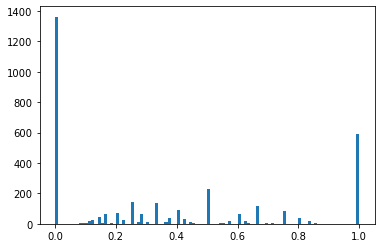

In [188]:
plt.hist(df_blast2go_sims["Jaccard_Sim"], bins= 100)

(array([4.400e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        3.000e+00, 4.000e+00, 1.300e+01, 0.000e+00, 1.400e+01, 0.000e+00,
        3.700e+01, 0.000e+00, 0.000e+00, 0.000e+00, 1.120e+02, 0.000e+00,
        0.000e+00, 0.000e+00, 1.900e+01, 2.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 2.030e+02, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        3.200e+01, 0.000e+00, 0.000e+00, 5.100e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 3.000e+01, 0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.363e+03, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        4.000e+00, 0.000e+00, 1.400e+01, 0.000e+00, 0.000e+00, 0.000e+00,
        3.800e+01, 0.000e+00, 0.000e+00, 1.000e+01, 0.000e+00, 4.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.110e+02, 0.000e+00, 0.000e+00,
        9.000e+00, 3.200e+01, 0.000e+0

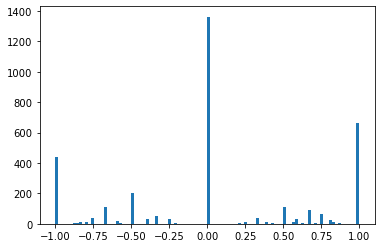

In [189]:
plt.hist(df_blast2go_sims["Overlap_Sim"], bins= 100)

In [182]:
mean_overlap_sim = df_blast2go_sims["Overlap_Sim"].mean()
mean_overlap_sim

# The positive value indicates that the InterPro GO IDs is sometimes larger than the other set of GO IDs

0.05427352217149928

In [163]:
len(df_blast2go_cleaned.index)

4373

# Sanity Checks

In [18]:
df_blast2go["GO IDs"][0]

'F:GO:0003688; F:GO:0005524; C:GO:0005737; P:GO:0006270; P:GO:0006275'

In [19]:
df_blast2go["InterPro GO IDs"][0]

'F:GO:0003677; F:GO:0003688; F:GO:0005524; P:GO:0006270; P:GO:0006275; F:GO:0043565'

In [11]:
df_gofeat["Gene onthology"][0]

'GO:0003688 - DNA replication origin binding|GO:0005524 - ATP binding|GO:0005737 - cytoplasm|GO:0006270 - DNA replication initiation|GO:0006275 - regulation of DNA replication'